In [ ]:
%pip install pandas seaborn matplotlib

# Importando Bibliotecas

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.simplefilter("ignore")

# Display all columns and rows in the output :

In [5]:
pd.set_option("display.max_columns",None)
pd.set_option('display.max_rows',None)

In [7]:
train=pd.read_csv('./kaggle/input/titanic/train.csv')
test=pd.read_csv('./kaggle/input/titanic/test.csv')

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
train.shape

(891, 12)

In [11]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
train[['Survived', 'Pclass', 'SibSp', 'Parch', 'Sex', 'Embarked']]=train[['Survived', 'Pclass', 'SibSp', 'Parch', 'Sex', 'Embarked']].astype('category')

In [14]:
train.describe()

,PassengerId,Age,Fare
count,891.000000,714.000000,891.000000
mean,446.000000,29.699118,32.204208
std,257.353842,14.526497,49.693429
min,1.000000,0.420000,0.000000
25%,223.500000,20.125000,7.910400
50%,446.000000,28.000000,14.454200
75%,668.500000,38.000000,31.000000
max,891.000000,80.000000,512.329200


In [15]:
train.describe(include='category')

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


In [16]:
#show if there are full duplicates 
train.duplicated().sum()

np.int64(0)

In [17]:
nans = train.isna().sum().sort_values(ascending=False)
pct = 100 * nans / train.shape[0]
nan_stats = pd.concat([nans, pct], axis=1)
nan_stats.columns = ['num_of_nans', 'percentage_of_nans']
nan_stats

,num_of_nans,percentage_of_nans
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Name,0,0.000000
Pclass,0,0.000000
Survived,0,0.000000
Sex,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000


In [18]:
train.drop(['PassengerId','Cabin','Name','Ticket'],axis=1,inplace=True)

In [19]:
test.drop(['Cabin','Name','Ticket'],axis=1,inplace=True)

In [20]:
train.dropna(subset=['Embarked'], inplace=True)

In [21]:
train.isna().sum().sum()

np.int64(177)

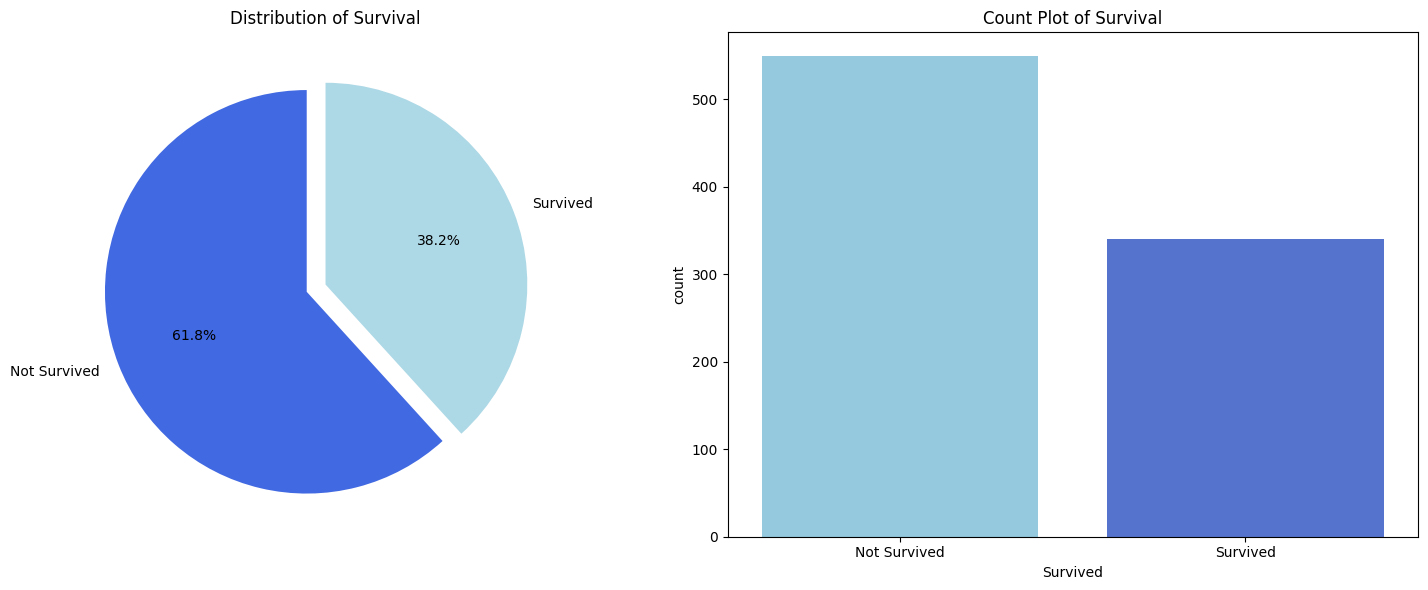

In [22]:
# Define colors
light_blue = '#ADD8E6'
sky_blue = '#87CEEB'
dodger_blue = '#1E90FF'
royal_blue = '#4169E1'

explode = (0.1, 0)  


fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart for the distribution of survival
survival_counts = train['Survived'].value_counts()
axes[0].pie(
    survival_counts,
    labels=['Not Survived', 'Survived'],
    autopct='%1.1f%%',
    startangle=90,
    colors=[royal_blue, light_blue],
    explode=explode  
)
axes[0].set_title('Distribution of Survival')

# Count plot for survival count
sns.countplot(
    x='Survived',
    data=train,
    palette=[sky_blue, royal_blue],  
    ax=axes[1]
)
axes[1].set_title('Count Plot of Survival')
axes[1].set_xticklabels(['Not Survived', 'Survived'])

# Adjust layout
plt.tight_layout()
plt.show()

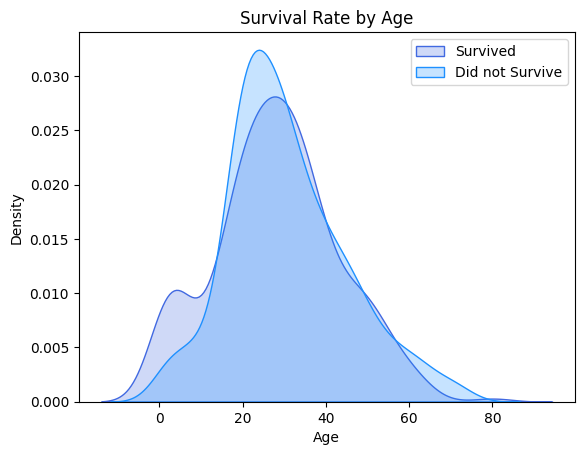

In [23]:
sns.kdeplot(
    train[train['Survived'] == 1]['Age'],
    shade=True,
    color=royal_blue,
    label='Survived'
)

sns.kdeplot(
    train[train['Survived'] == 0]['Age'],
    shade=True,
    color=dodger_blue,
    label='Did not Survive'
)


plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()

plt.show()

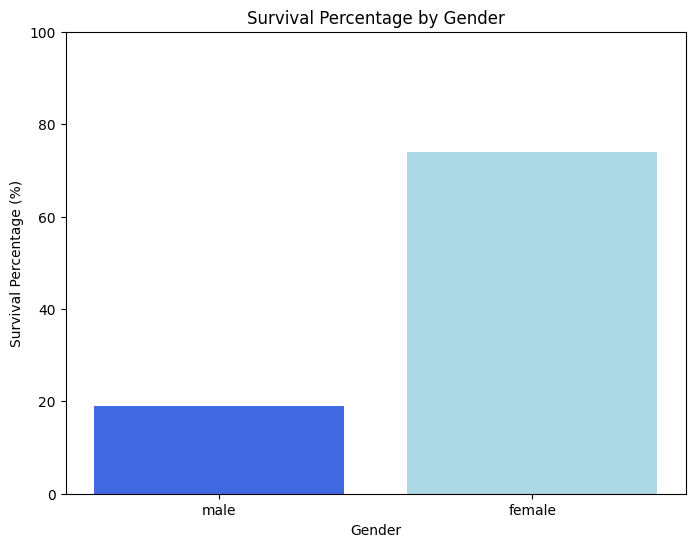

In [24]:
survival_percentages = {}

# Calculate survival percentage by gender
for gen in train['Sex'].unique():
    gender_df = train[train['Sex'] == gen]
    survived = gender_df[gender_df['Survived'] == 1]
    survived_percentage = (survived.shape[0] / gender_df.shape[0]) * 100
    survival_percentages[gen] = survived_percentage

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(survival_percentages.keys(), survival_percentages.values(), color=[royal_blue, light_blue])
plt.xlabel('Gender')
plt.ylabel('Survival Percentage (%)')
plt.title('Survival Percentage by Gender')
plt.ylim(0, 100)  
plt.show()

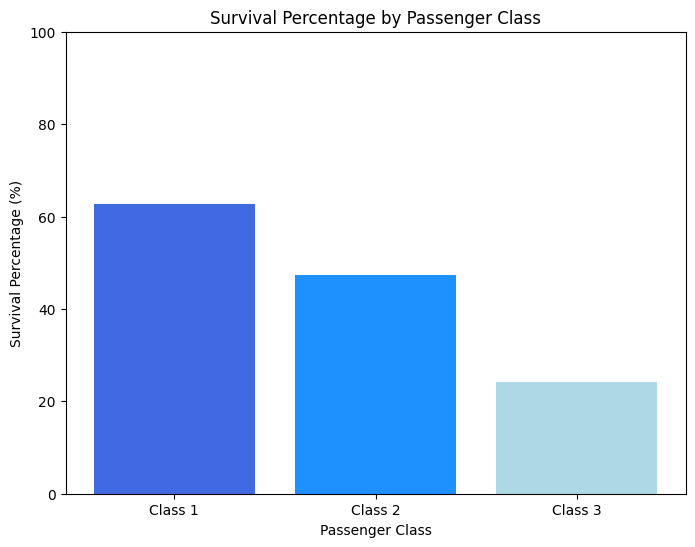

In [25]:
# Define colors for each Pclass
colors = {
    1: royal_blue,
    2: dodger_blue ,
    3: light_blue
}

# Initialize dictionary to store survival percentages by Pclass
survival_percentages_by_class = {}

# Calculate survival percentage by Pclass
for p_class in train['Pclass'].unique():
    class_df = train[train['Pclass'] == p_class]
    survived = class_df[class_df['Survived'] == 1]
    survived_percentage = (survived.shape[0] / class_df.shape[0]) * 100
    survival_percentages_by_class[p_class] = survived_percentage

# Plotting
plt.figure(figsize=(8, 6))

# Retrieve colors for the classes
plot_colors = [colors.get(p_class, royal_blue) for p_class in survival_percentages_by_class.keys()]

plt.bar(survival_percentages_by_class.keys(), survival_percentages_by_class.values(), color=plot_colors)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Percentage (%)')
plt.title('Survival Percentage by Passenger Class')
plt.ylim(0, 100)  
plt.xticks(ticks=list(survival_percentages_by_class.keys()), labels=[f'Class {i}' for i in survival_percentages_by_class.keys()])

plt.show()

In [26]:
def age_to_category(Age):
    if Age < 4:
        return 0  # "baby"
    elif Age < 10:
        return 1  # "child"
    elif Age < 21:
        return 2  # "teen"
    elif Age < 33:
        return 3  # "young adult"
    elif Age < 50:
        return 4  # "adult"
    return 5  # "elder"

# Apply the function to create a new column 'AgeCat'
train['Age_Cat'] = train['Age'].apply(age_to_category)

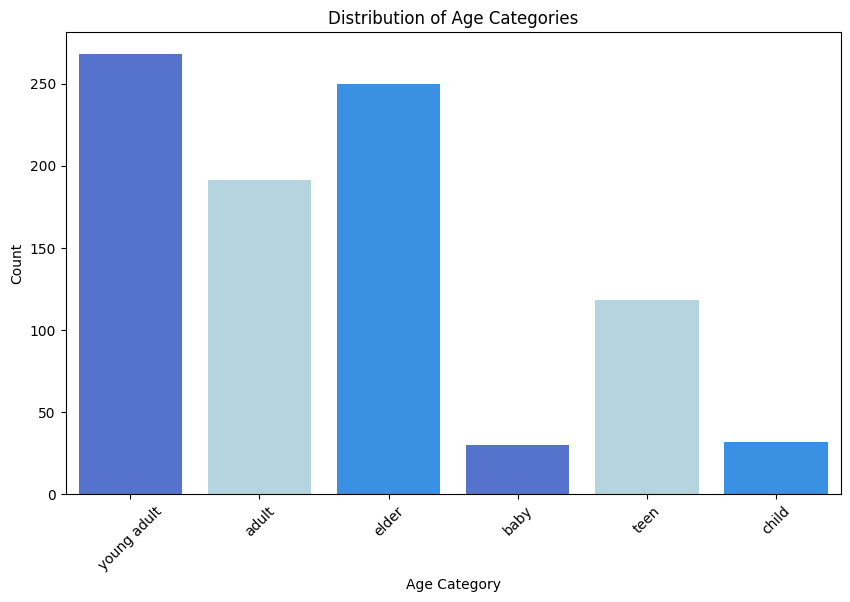

In [27]:
age_cats = {
    0: "baby",
    1: "child",
    2: "teen",
    3: "young adult",
    4: "adult",
    5: "elder"
}

# Replace the numerical categories with descriptive names for the plot
train['Age_Cat'] = train['Age_Cat'].map(age_cats)

plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Cat', data=train, palette=[royal_blue, light_blue, dodger_blue])
plt.title('Distribution of Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

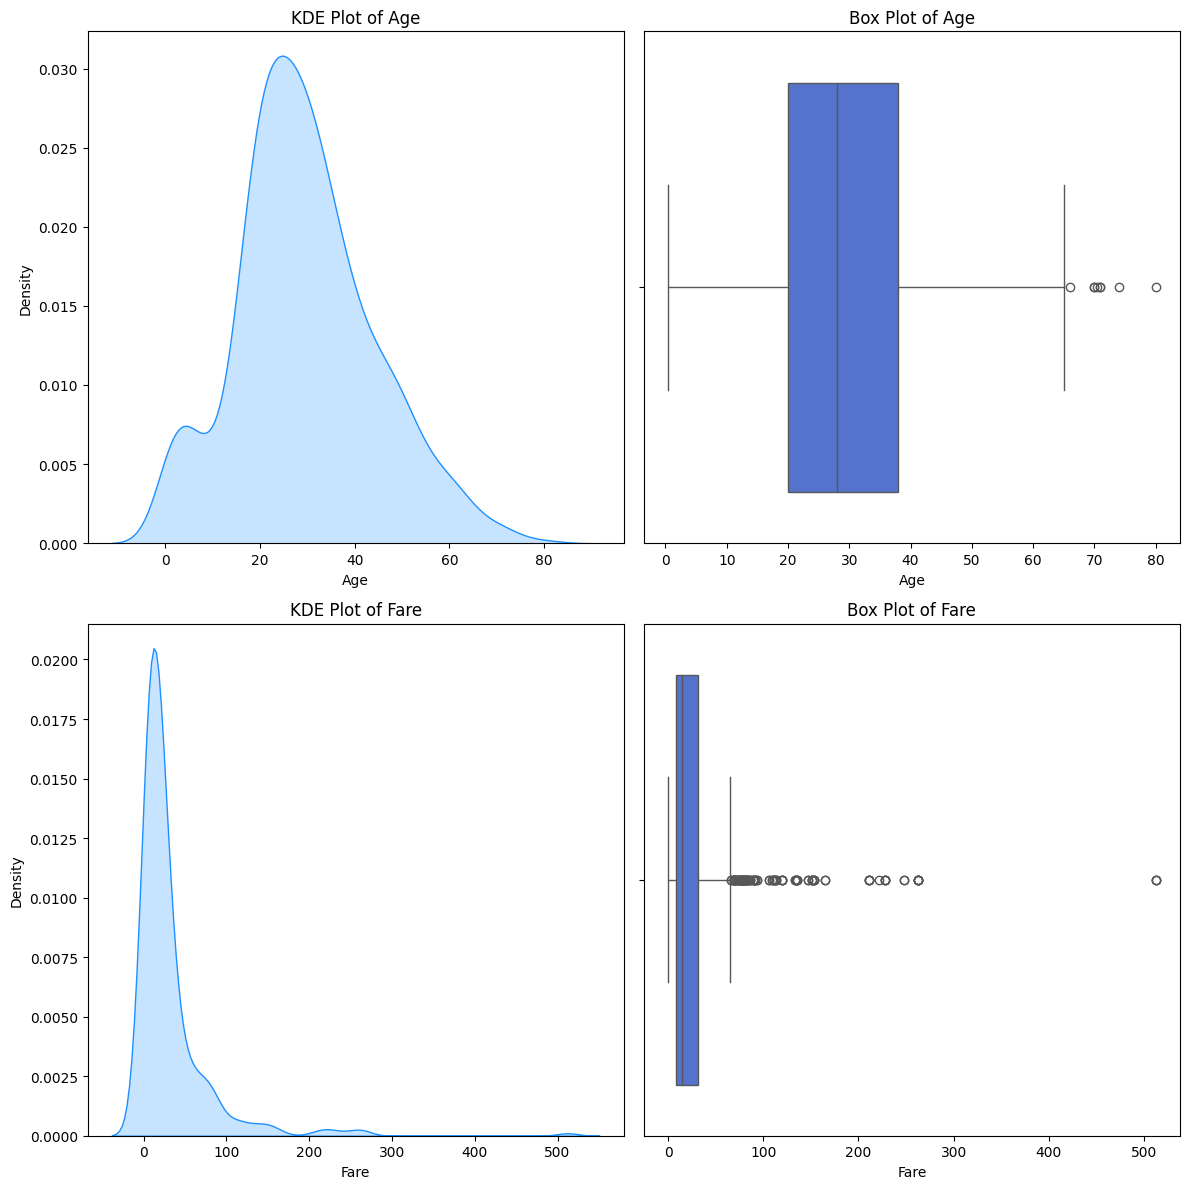

In [28]:
# Define numerical columns to plot
numerical_columns = ['Age', 'Fare']  # Add or modify columns as needed

# Create subplots
fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(12, 6 * len(numerical_columns)))

# Iterate over numerical columns
for i, col in enumerate(numerical_columns):
    # KDE Plot
    sns.kdeplot(train[col], ax=axes[i, 0], fill=True, color='dodgerblue')
    axes[i, 0].set_title(f'KDE Plot of {col}')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Density')
    
    # Box Plot
    sns.boxplot(x=train[col], ax=axes[i, 1], color='Royalblue')
    axes[i, 1].set_title(f'Box Plot of {col}')
    axes[i, 1].set_xlabel(col)

# Adjust layout
plt.tight_layout()
plt.show()

# Pré Processamento

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

ModuleNotFoundError: No module named 'sklearn'